In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Chapter I : EDA
## 1- Histogram plot (continous variable) : 

(+) : observe quicly trends and informations about the data
(-) : can be missleading because of the binning bias, as the trends on histogram depends on the number of bins
      we can not confirm the trends spotted, because only one variable is plotted. 

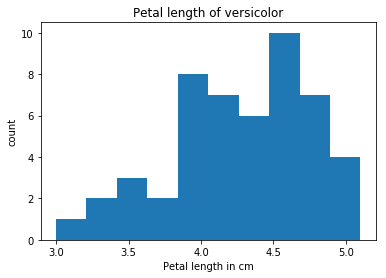

In [3]:
# Loading data 
iris = pd.read_csv('iris.csv')

# Extract iris versicolor petal lenth 
versicolor_petal_length = iris[iris['species']=='versicolor']['petal_length']

# Histogram of versicolor_petal_length (continous variable)
plt.hist(versicolor_petal_length);
plt.xlabel('Petal length in cm');
plt.ylabel('count');
plt.title('Petal length of versicolor');
plt.show()

#### Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. You specify the number of bins using the bins keyword argument of plt.hist()

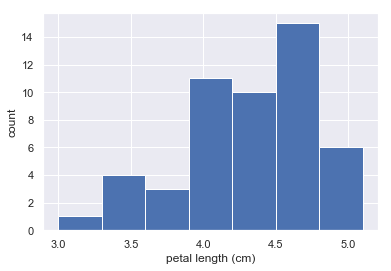

In [4]:
# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins= int(n_bins)

# Plot the histogram using seaborn functionalities (better looking)
sns.set()
_= plt.hist(versicolor_petal_length, bins=n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


## 2- Swarm plot (x= categorical variable, y = count of the categorical variable) : 

(+) plotting all of the data in one plot helps to see the trends and compare btw them.

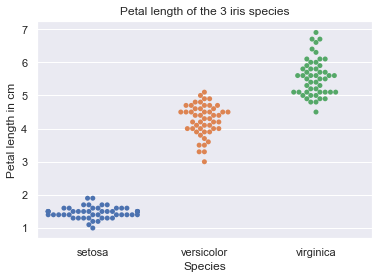

In [5]:
# swarm plot of the petal length of all the species : 

sns.swarmplot(x='species', y='petal_length', data=iris),
plt.xlabel('Species')
plt.ylabel('Petal length in cm')
plt.title('Petal length of the 3 iris species')
plt.show()


#From the plot we can see that : 
#I. virginica petals tend to be the longest, and I. setosa petals tend to be the shortest of the three species.
#some individual I. virginica flowers may be shorter than individual I. versicolor flowers.

## Empirical cumulative distribution functions :

ECDFs are among the most important plots in statistical analysis, shows all the data, and how it's distributed

step 1: sort the data (x)

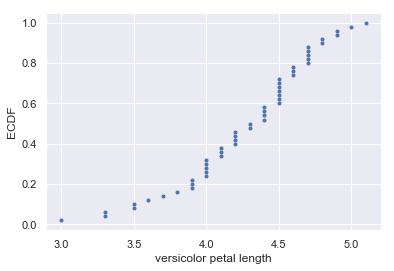

In [6]:
#function that takes as input a 1D array of data and then returns the x and y values of the ECDF. 

# Step1 : Sorting Data for ECDF

def ecdf(data): 
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Step1 : plotting ECDF

# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker='.',linestyle = 'none' )

# Label the axes
plt.xlabel('versicolor petal length')
plt.ylabel('ECDF')


# Display the plot
plt.show()

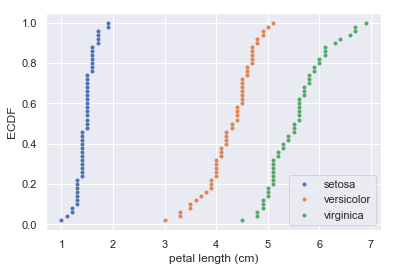

In [7]:
# Comparison of ECDFs
#ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). 
#Here, you will plot ECDFs for the petal lengths of all three iris species. 
#You already wrote a function to generate ECDFs so you can put it to good use!

#To overlay all three ECDFs on the same plot, you can use plt.plot() three times, once for each ECDF. 
#Remember to include marker='.' and linestyle='none' as arguments inside plt.plot().


versicolor_petal_length = iris[iris['species']=='versicolor']['petal_length']
virginica_petal_length = iris[iris['species']=='virginica']['petal_length']
setosa_petal_length = iris[iris['species']=='setosa']['petal_length']



# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)



# Plot all ECDFs on the same plot
_=plt.plot(x_set, y_set, marker='.', linestyle='none')
_=plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_=plt.plot(x_virg, y_virg, marker='.', linestyle='none')


# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

#The ECDFs expose clear differences among the species. 
#Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

# Chapter II : Quantitative EDA
## 1- Summary statistiques : 
#### The mean : 
np.mean()
Heavily influenced by outlier 


#### The median: 
np.median()
is the middle value of a data set (sort data and choose the data that devides 50% up and 50% down)
Is better than the mean, because it isn't influenced by outliers 

In [8]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)
mean_length_vers

4.26

#### Percentiles, outliers, and box plots : 


##### Percentiles : 
np.percentiles()

Median (50th pencentile)
25 % percentile : is the value of the data point that is greater than 25

##### outliers : 
Sometimes outliers are just datapoints with extrem values and should not be counsidered erroring unless proven so.

##### Boxplot(seaborn) :
when computing statistics it's better to summeriz them in one graph. 
outliers
whisks
75th percentile
50th percentile (median)
25th percentil

In [9]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


### Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

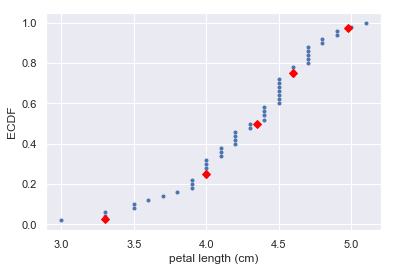

In [10]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')


plt.show()

### Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. 

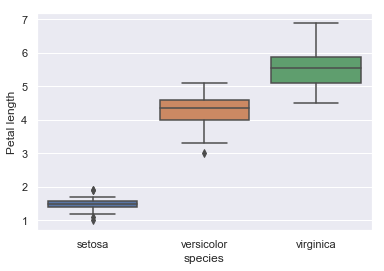

In [11]:
# Create box plot with Seaborn's default settings
_= sns.boxplot(x='species', y='petal_length', data=iris)
_= plt.xlabel('species')
_= plt.ylabel('Petal length')
plt.show()


### Variance and standard deviation

#### Variance :

np.var()
Mesures the spread of data from the means in squared quantities 
it equals to the mean squared distance of the data from the mean. 

#### standard deviation
np.std()
Mesures the spread of data from the means in the same unit(not squared) 
square root of the variance

### Covariance and Pearson correlation coefficient

#### Covariance : 
np.cov()

measures how two variables vary together

####  Pearson correlation coefficient 

np.corrcoef()

p = -1 anticorrelated 

p= 0 no correlation

p = 1 correlated

it's the comparison of the variability in the data due to co dependence (covariance)/ to the variability inherent in each variable independently (std)

measures the correlation dimentionlessly (without unit) so we divide the covariance by (std x)(std y)
equal to the Coariance / (std x)(std y)

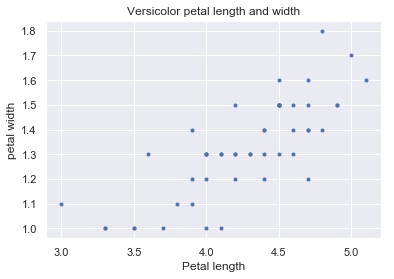

In [12]:
## Scatter plots of versicolor_petal_length, versicolor_petal_width

#When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. 
#But what if you want to compare two properties of a single species? 
#This is exactly what we will do in this exercise. 
#We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. 
#If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.


versicolor_petal_length
versicolor_petal_width = iris[iris['species']=='versicolor']['petal_width']

plt.plot(versicolor_petal_length,versicolor_petal_width, marker='.', linestyle='none')
plt.xlabel('Petal length')
plt.ylabel('petal width')
plt.title('Versicolor petal length and width')
plt.show()


#Indeed, we see some correlation. Longer petals also tend to be wider. but we are going to calculate them after
# np.cov 
#np.corroef

## looking at sevral scatter plot of diffrent data we can conclude wich plot has: 
#the highest variance in the variable x,
#the highest covariance,
#negative covariance?


##### Computing the covariance : np.cov()
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [13]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length,versicolor_petal_width)

print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


#### Computing the Pearson correlation coefficient

The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. 


In [14]:
np.corrcoef(versicolor_petal_length,versicolor_petal_width)

array([[1.        , 0.78666809],
       [0.78666809, 1.        ]])

# Chapter III : Thinking probabilistically-- Discrete variables

## 1- Probabilistic logic and statistical inference

Probabilistic logic : allows us to measure incertinty, Probabilistic language is in fact very precise. It precisely describes uncertainty.(and measure how much data may vary)

statistical inference : going from certain conclusions about measured data to draw probabilistic conclusions about same unmeasured data (if we collect the same data again) :

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

## 2- Random number generators and hacker statistics: 

hacker statistics : instead of aquiring data over and over, we can simulate the repeated measurements to compute probabitily 

The np.random module : is a suite of functions based on random number generation 

*** simulating the outcome of 4 succesive coinflips (goal: compute the probability of getting 4heads out of 4flips)

np.random.random() : The function returns a random number between zero and one/draw a number btw 0 and 1, such as all numbers in these interval are equally likely to occur : 

if 0.5> the number draw   'head'
if 0.5 < the number draw  'tail'

** Bernoulli trial : an experiment that has 2 output or options : true or false (head or tail)

random number seed : integer feed into random number generating algorithm (random number sucession), the same seed give the same sequence of random numbers. (to assure reproducibility we need to set the random seed manually) 

In [31]:
#simulating the outcome of 4 succesive coinflips (goal: compute the probability of getting 4heads out of 4flips)

np.random.seed(42)
random_numbers = np.random.random(size=4)
print(random_numbers)

head = random_numbers < 0.5
print(head)

np.sum(head)

# the probability of getting heads if we repead the flip over and over 

## intialize the number of 4 heads trial 

#sum of the times we will get 4 heads in the 1000 flip
n_all_heads = 0 

for i in range(10000): 
    heads= np.random.random(size=4) < 0.5
    n_heads= np.sum(heads)
    if n_heads == 4: 
        n_all_heads += 1
        
print('The number of time we will get 4 heads succesively in flipping the coin 10000 times :', n_all_heads)
# probability : number of times we got 4 heads devided by the number of the trials :
proba = n_all_heads/10000
proba


#Hacker statistics probavilities : 
# 1 determine how to simulate data 
# simulate many many times 
# probability : is aproximatively the fraction of trials with the outcome of interest 

[0.37454012 0.95071431 0.73199394 0.59865848]
[ True False False False]
The number of time we will get 4 heads succesively in flipping the coin 10000 times : 619


0.0619

### APPLICATION : 

##### 1/ The np.random module and Bernoulli trials

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability p of landing heads (success) and probability 1−p of landing tails (failure). In this exercise, you will write a function to perform n Bernoulli trials, perform_bernoulli_trials(n, p), which returns the number of successes out of n Bernoulli trials, each of which has probability p of success. To perform each Bernoulli trial, use the np.random.random() function, which returns a random number between zero and one.


##### 2/How many defaults might we expect?

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.


##### 3/ Will the bank fail?
Plot the number of defaults you got from the previous exercise, in your namespace as n_defaults, as a CDF. The ecdf() function you wrote in the first chapter is available.

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


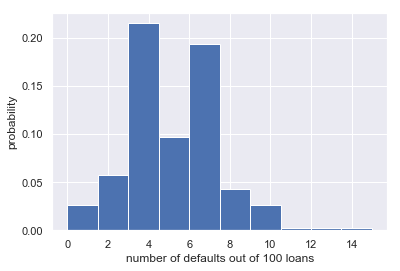

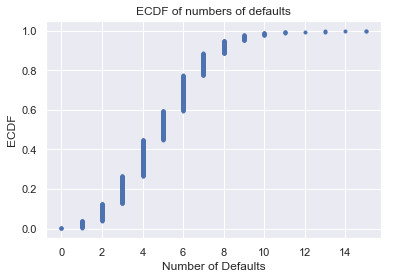

Probability of losing money = 0.022


In [38]:
# 1/ The np.random module and Bernoulli trials 
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials(this could be simplified usig np.random.random(size=))
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1

    return n_success


# 2/How many defaults might we expect?


# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)


# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


##### 3/ Will the bank fail?

# Compute ECDF: x, y
x, y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_= plt.plot(x, y, marker='.',linestyle = 'none' )
_= plt.xlabel('Number of Defaults')
_= plt.ylabel('ECDF')
_= plt.title('ECDF of numbers of defaults')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))

#As we might expect, we most likely get 5/100 defaults. 
#But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

## 3-Probability distributions and stories: The Binomial distribution

Probability mass function (PMF) : set of probabilities of discret outcomes (proprty of discret probability distibution, exapmle : the previous exercice)

Discret uniform PMF : ex: rolling a 6 faced die (discret : because you can't roll is 3,5), (uniform : all outcomes have have an equal probability of 1/6 to happen) 

The Binomial distribution (mathematcal discription of one outcome(true/false) of Bernoulli trials : Example :the number of succes(true)(r) in (n) Bernoulli trials with probability (P) of succes.

i.e : the number of heads (r) in 4 coinflips with the probability of 0.5, is Binomally distributed.



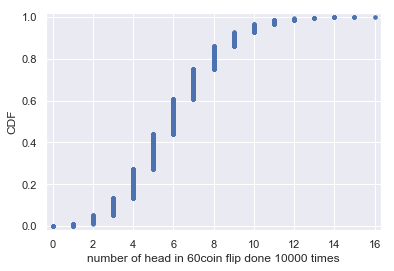

In [47]:
# Sampling the Binomial distribution of 4coinflips :

number_of_heads = np.random.binomial(4, 0.5)

# repeating/ simulationg the 4coinflip 10 times :

number_of_heads_repeated = np.random.binomial(4, 0.5, size=10)
number_of_heads_repeated

# The binomial PMF 

# not easy to implement the The binomial PMF distribution as (batonet histogram)/ so we plot histogram
sample = np.random.binomial(60, 0.1, size=10000)

# The binomial CDF (easier to plot)

x, y = ecdf(sample)

sns.set()
_= plt.plot(x,y, marker='.', linestyle='none')
plt.margins(0.02)
_= plt.xlabel('number of head in 60coin flip done 10000 times')
_= plt.ylabel('CDF')
plt.show()

#### Application : 

##### 1- Sampling out of the Binomial distribution in 100 loans

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials() function, but far more computationally efficient. Given this extra efficiency, we will take 10,000 samples instead of 1000. After taking the samples, plot the CDF as last time. This CDF that you are plotting is that of the Binomial distribution.

Note: For this exercise and all going forward, the random number generator is pre-seeded for you (with np.random.seed(42)) to save you typing that each time.

##### 2- Plotting the Binomial PMF :
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5. You can generate an array like this using np.arange() and then subtracting 0.5 from the array.

You have already sampled out of the Binomial distribution during your exercises on loan defaults, and the resulting samples are in the NumPy array n_defaults.

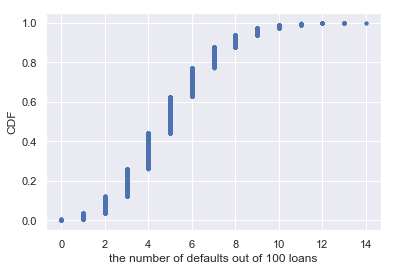

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


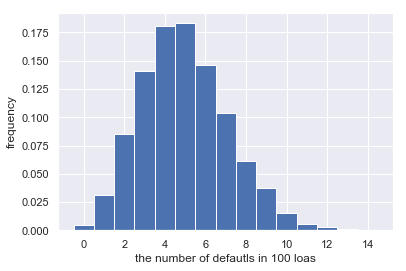

In [50]:
# 1- Sampling out of the Binomial distribution in 100 loans


np.random.seed(42)
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(100, 0.05,10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker='.', linestyle='none')
_= plt.xlabel('the number of defaults out of 100 loans')
_= plt.ylabel('CDF')

plt.show()

# 2- Plotting the Binomial PMF :

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_= plt.hist(n_defaults, normed=True, bins= bins)

# Label axes
_ = plt.xlabel('the number of defautls in 100 loas')
_ = plt.ylabel('frequency')

# Show the plot
plt.show()

## 4-Poisson processes and the Poisson distribution :

*poisson process : the time of the next event is complety independent of when the time of the previous event happened.

*Poisson distribution : is the number of poisson procces in a given amout of time. in other word it is the the number of arrivals (r) of a poisson procces in a given time interval with an average rate of Y arrivals per interval in poisson disributed

ex : arrival of a bus, his on a website.

#### Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

*Poisson distribution : is the limit of the binomial distibution for low probability of True (succes) and large number of trials. that is of rare events.


Rule : 
When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season

#### Poisson PMF  (not easy to plot)  

#### Poisson CDF

poisson_process_succes = np.random.poisson(average per intervan of time,size=)


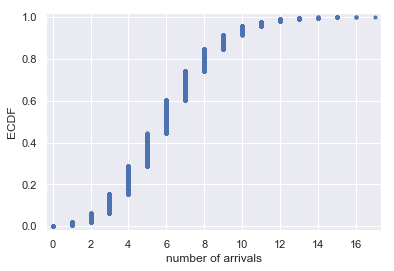

In [53]:
# Ex : bus arrival :
np.random.seed(42)

p_samples = np.random.poisson(6,10000)
x, y = ecdf(p_samples)
plt.plot(x, y, marker ='.', linestyle = 'none')
plt.margins(0.02) 
plt.xlabel('number of arrivals')
plt.ylabel('ECDF')
plt.show()



In [54]:
#### Relationship between Binomial and Poisson distributions :


# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
# Make a list of the n and p values to consider for the Binomial distribution. 
#Choose n = [20, 100, 1000] and p = [0.5, 0.1, 0.01] so that np is always 10.

n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

#The means are all about the same, The std of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.


Poisson:      10.0291 3.1507543842705354
n = 20 Binom: 9.9887 2.2242239792790652
n = 100 Binom: 10.0052 3.01280151354184
n = 1000 Binom: 9.9474 3.127144582522529


# Chapter IV : Thinking probabilistically-- continous variables 

## 1- Probability density functions : 

Probability density functions (is the continous analong of the PMF) : it describes the chances of observing of a continous variables (mathematical description of the relative likelihood of observing a value of a continous variable) 

#### Normal PDF : 
Can have multiple peak at a condition that the area under the peak == 1
probability of X== ?: is the % area under the PDF (the percentage of the area 'par rapport au' PDF : ex: 30% out of 100%)

#### Normal CDF : 

Reading CDF plot : it CDF gives the probability of x will be less than the value on x-axis 


## 2- Introduction to the Normal distribution :

Normal distribution : describes a continuous variable whose PDF has a single symmetric peak. it's parametrized by 2 parameters : the mean (the centre of the peak), the std (how wide the peak is or how spread out the data is from the mean). 

NOT TO CONFUSE : the mean and the Std of a normal distribution of a given is not the mean and the Std computed directly from the same data. 


### comparing data to a normal PDF : 

To do this comparision we need to plot the ECDF of the dat,m and the theoritical CDF of the normal distribution.  

#### Step 1: Theoritical CDF of the normal distribution : 
samples = np.random.normal(mean, std, size=) 
the mean and std are computed from the data because they represent good estimate. 
x_theo, y_theo = ecdf(samples)
#### Step 2: ECDF of the data :
x, y = ecdf(data) 
#### Step 3 : plotting Theoritical CDF of the normal distribution and ECDF of the data

with the abscence of binning bias, it's much clearer that the data are approximatively distributed. 


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


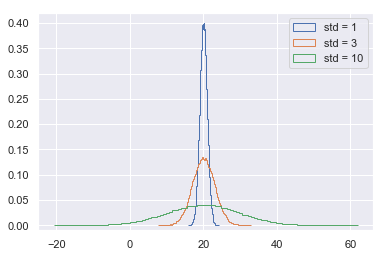

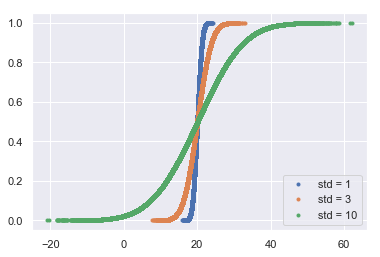

In [56]:
# The Normal PDF : 

#In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. 
#Specifically, you will plot a Normal PDF for various values of the variance.


# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1, size =100000)
samples_std3= np.random.normal(20,3, size =100000)
samples_std10 = np.random.normal(20,10, size =100000)

# Make histograms
plt.hist(samples_std1, normed=True,bins = 100, histtype='step')
plt.hist(samples_std3,  normed=True,bins = 100, histtype='step')
plt.hist(samples_std10,  normed=True,bins = 100, histtype='step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

#You can see how the different standard deviations result in PDFs of different widths. 
#The peaks are all centered at the mean of 20.



# The Normal CDF

# Generate CDFs using ecdf():

x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_= plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_= plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_= plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

#the CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal.
#The width of the CDF varies with the standard deviation.



## 3- The Normal distribution(gaussian distribution): Properties and warnings (caveats)



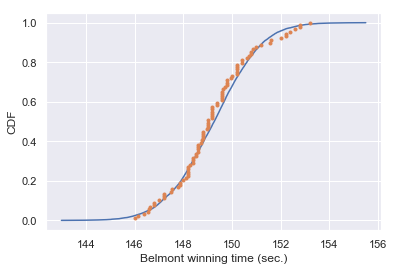

In [62]:
belmont_no_outliers= np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,152.2 ])
             
# Compute mean and standard deviation: mu, sigma

mean_belmont= np.mean(belmont_no_outliers)
                              
std_belmont = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
sampls = np.random.normal(mean_belmont, std_belmont, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(sampls)
x, y = ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

#The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. 
#This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.



In [64]:
#What are the chances of a horse matching or beating Secretariat's record?

#Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), 
#what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mean_belmont, std_belmont, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) /len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

#We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. 
#We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.


Probability of besting Secretariat: 0.000608


## 4- The Exponential distribution

The number of buses that will arrive per hour at at poissonvill are a poisson distribution but the amount of time btw arrival of buses is exponentially distributed. 

Exponential distribution : the waiting time btw arrivals of a poisson proccess are exponintially distributed. it has a sinle parameter, that is the mean waiting time, this distibution is not peak as we can see from it's PDF.


#### how is the waiting time until the next performance as good or better than Secretariat's distributed?
Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed. 

The Exponential distribution describes the waiting times between rare events, and Secretariat is rare


## Application : 

If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.


### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.


### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.


/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


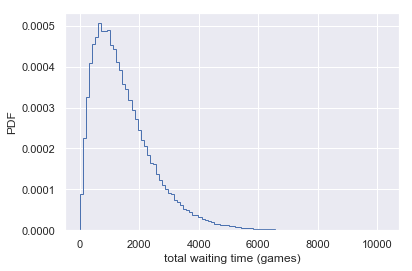

In [66]:
### If you have a story, you can simulate it!

def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size=size)

    return t1 + t2


### Distribution of no-hitters and cycles

# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, size=100000)

# Make the histogram
_ = plt.hist(waiting_times, bins=100, histtype='step',
             normed=True)

# Label axes
_ = plt.xlabel('total waiting time (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

#Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. 
#For fun (and enlightenment), I encourage you to also plot the CDF.